## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [8]:
# read data into a DataFrame  
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)  
%matplotlib inline  

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)  
df.head()  

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [61]:
df[['TV','radio']]  

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

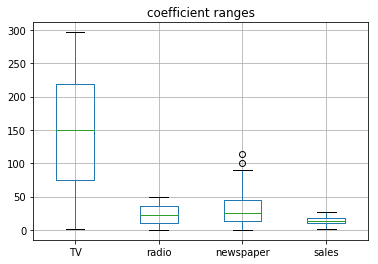

In [228]:
df.boxplot()
plt.title('coefficient ranges')
plt.show()  

%% The ranges of variables are very different, so we need to standardize them carefully.

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

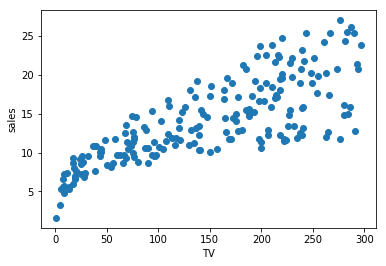

In [74]:
plt.scatter(df['TV'],df['sales'])  ## TV to sales
plt.xlabel('TV')  
plt.ylabel('sales')  
plt.show()

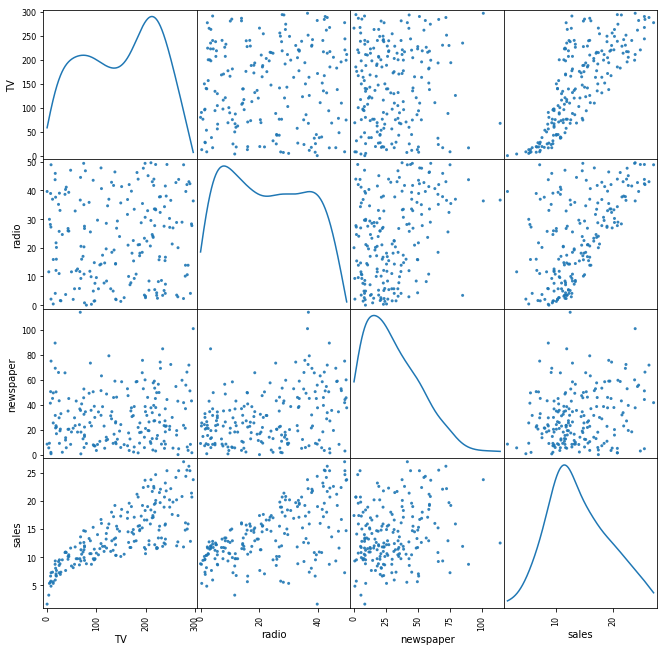

In [81]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.9,figsize=(11,11),diagonal='kde')  
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

%% There don't seem to be any strong correlations within predictive variables (scatter plots don't have strong trends). TV and radio seem to have positive correlations with sales (positive "slopes").

In [82]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


%% From the correlation matrix, we can also see the correlations between TV and sales and between radio and sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np

a) Set y to be the sales in df

In [17]:
y = df['sales']

b) Set X to be just the features described above in df

In [24]:
X = df.drop(['sales'],1)  

c) Randomly split data into training and testing - 80% training, 20% testing.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)  

## Other method: 
## size = float(len(X))
## X_train = X[0:int(size*0.8)]
## X_test = X[int(size*0.8):] 

d) Train model on training data, and make predictions on testing data

In [166]:
regr = LinearRegression()  
regr.fit(X_train, y_train)  
print('Residual sum of squares: %.2f' % np.mean((regr.predict(X_test) - y_test) ** 2)) 

Residual sum of squares: 2.33


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [161]:
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

R^2 Score: 0.90


%% This value is good. For variance score, 1 is a perfect prediction. From the score of 0.90, we can know that this model can explain 90% of the variance of the dependent variable.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

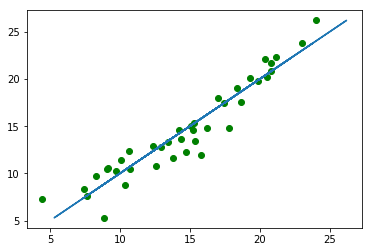

In [162]:
## testing data
plt.scatter(regr.predict(X_test),y_test,c='g')
plt.plot(y_test,y_test)
plt.show()

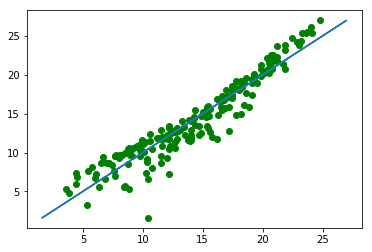

In [163]:
## try all the data
plt.scatter(regr.predict(X),y,c='g')
plt.plot(y,y)
plt.show()

%% This looks like a good model. We know R^2 is 0.90, and the prediction looks linear.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [185]:
## first standardize X data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()  
X2_train = scaler.fit_transform(X_train)  
X2_test = scaler.transform(X_test)  
regr.fit(X2_train, y_train)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 3.94830732  2.79812534 -0.1272671 ]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

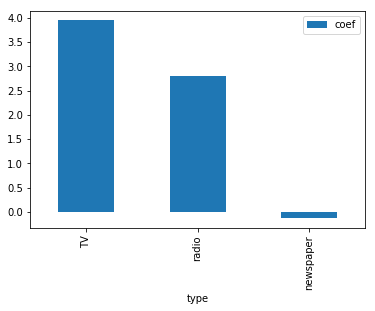

In [192]:
## Standardization of the data is needed for measuring the importance of the features
df2 = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})  
df2.plot(x='type',kind='bar')
plt.show()

%% We can see that TV is the most important feature.          

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

Coefficients: 
 [ 0.01918396  0.02648516  0.00109794]
Residual sum of squares: 0.39
Variance score: 0.99


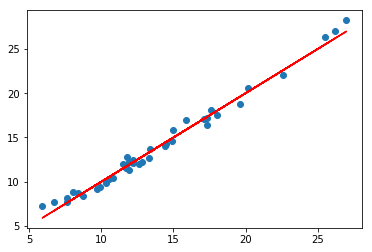

In [28]:
## introduce a non-linear term, focus on TV and radio
X3=X
X3['TV*radio']=X3['TV']*X3['radio']
X4 = X3.drop(['newspaper'],1)

size = float(len(X4))

X4_train = X4[0:int(size*0.8)]
X4_test = X4[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X4_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X4_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X4_test, y_test))

plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')
plt.show()

%% We can see that the performance has improved a lot.

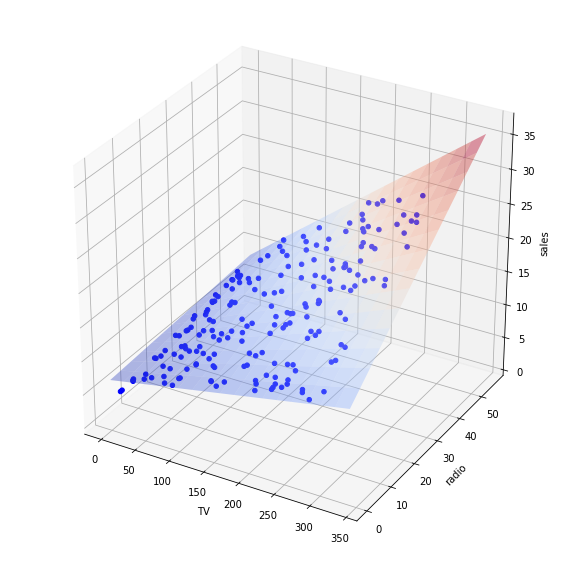

In [1]:
## plot the data in 3D space
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')


plt.show()

In [36]:
## using a nonlinear-non parametric model
from sklearn.tree import DecisionTreeRegressor

# We Choose 80% for training, 20% for testing. This should really be done randomly.
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(X_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.38
Variance score: 0.99


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


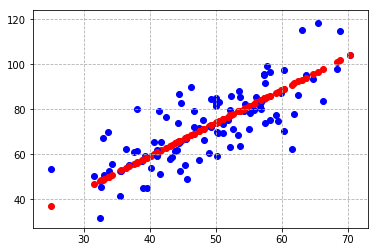

In [15]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ('Starting gradient descent at b = {0}, m = {1}, error = {2}'.format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ('After {0} iterations b = {1}, m = {2}, error = {3}'.format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],c='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

learning_rate = 0.0001
num_iterations = 100
run(num_iterations,learning_rate)
plt.grid(linestyle='--')
plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


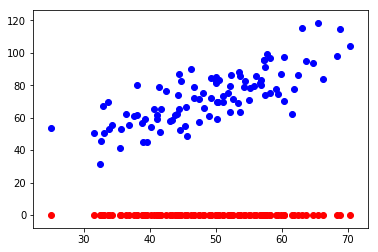

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


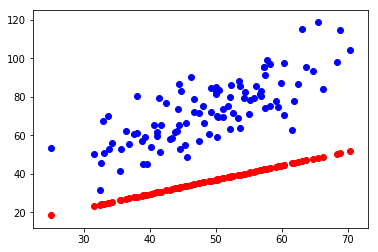

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


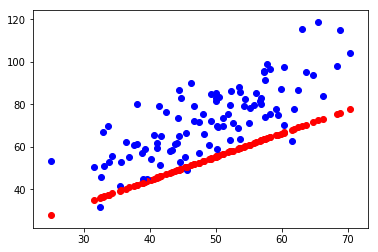

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


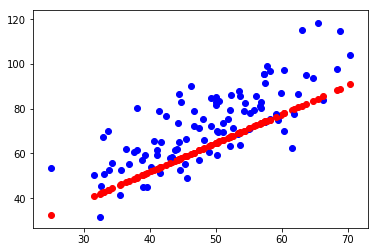

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


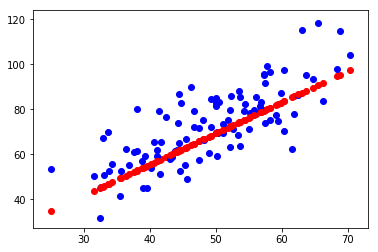

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


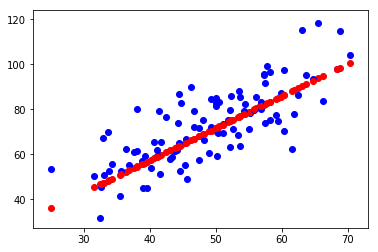

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


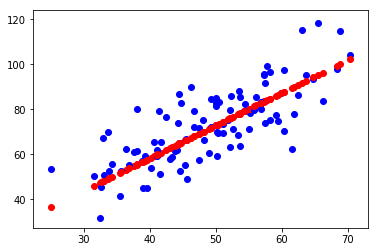

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


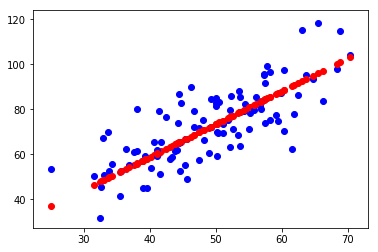

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


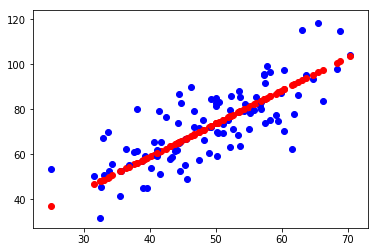

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


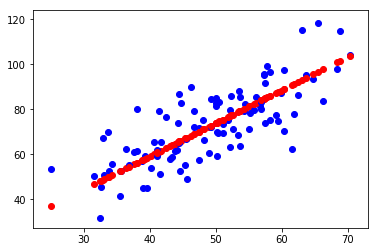

In [61]:
## visually discuss convergence rate based on learning rate
## example of a good learning rate: convergence is fast
learning_rate = 0.0001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


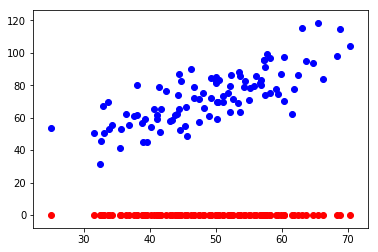

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


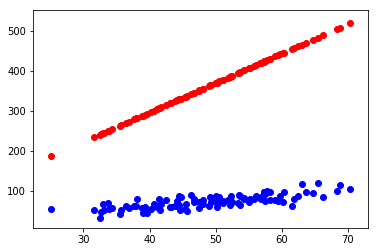

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


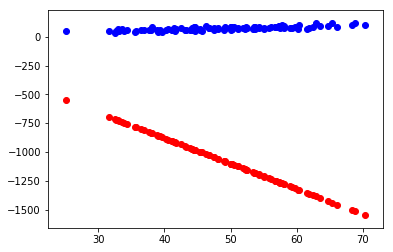

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


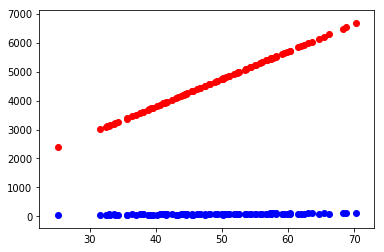

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


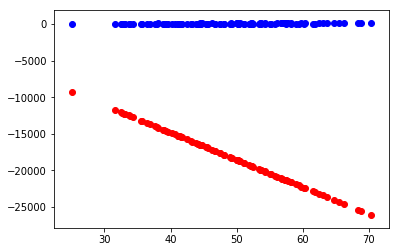

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


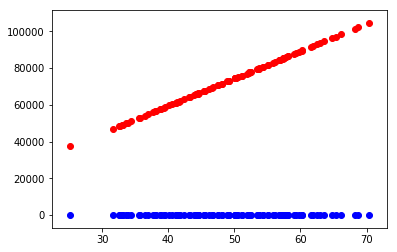

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


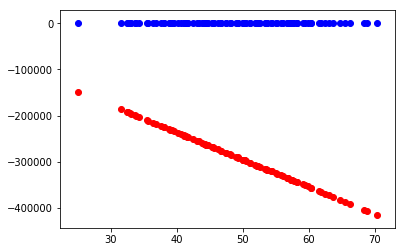

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


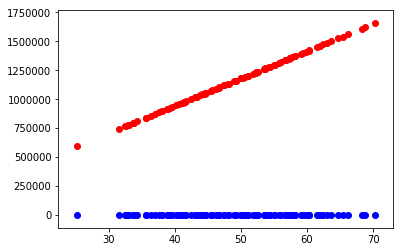

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


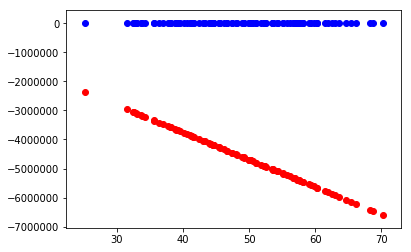

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


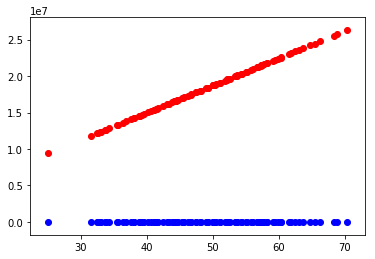

In [63]:
## example of a bad learning rate: can't converge
learning_rate = 0.001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


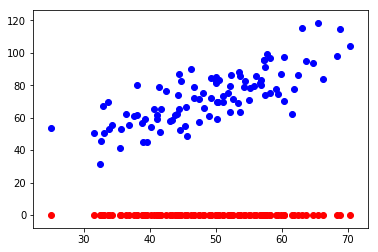

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


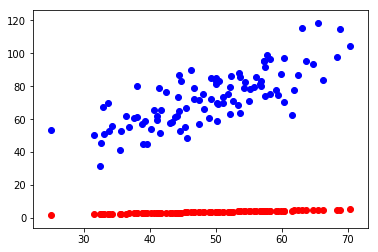

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


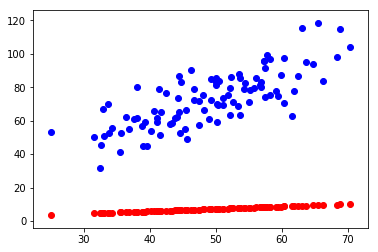

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


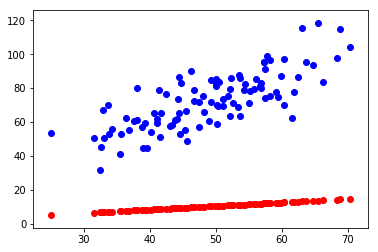

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


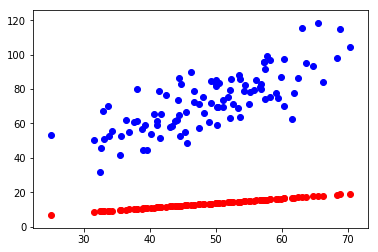

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


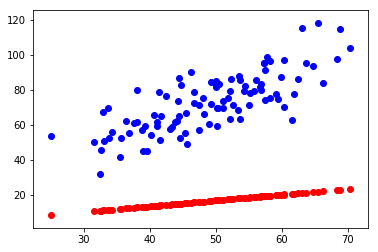

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


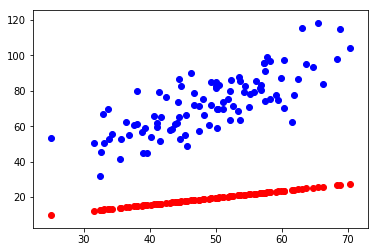

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


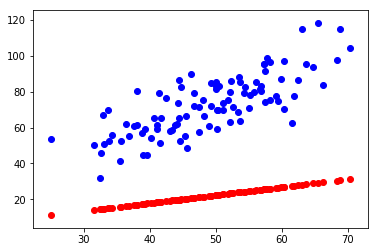

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


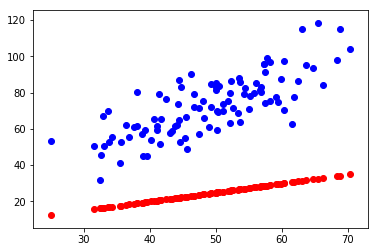

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


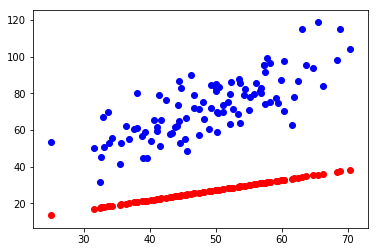

In [218]:
## example of an inefficient learning rate: convergence is slow
learning_rate = 0.00001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

%% From the following equation, we can figure out the role of the learning rate κ:
βn=βn−1−κ∇βL(βn−1).
The learning rate κ determines the time step size in the gradient descent method. On one hand, if κ is too small, the difference between βn−1 and βn will also be very small, so it may take a very long time (large n) to find an acceptable minimum β∗. In this case, the convergence is too slow, and the learning rate is inefficient. On the other hand, if κ is too large, we may bypass the minimum value due to the large step size, leading to a divergent solution (oscillate back and forth). 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

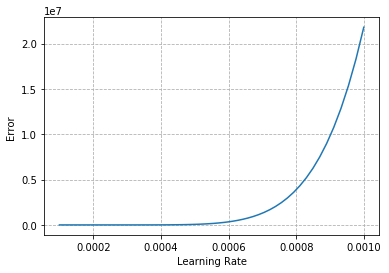

In [59]:
## error to learning rate
points = np.genfromtxt('../data/data.csv', delimiter=',')

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))
plt.grid(linestyle='--')
plt.show()

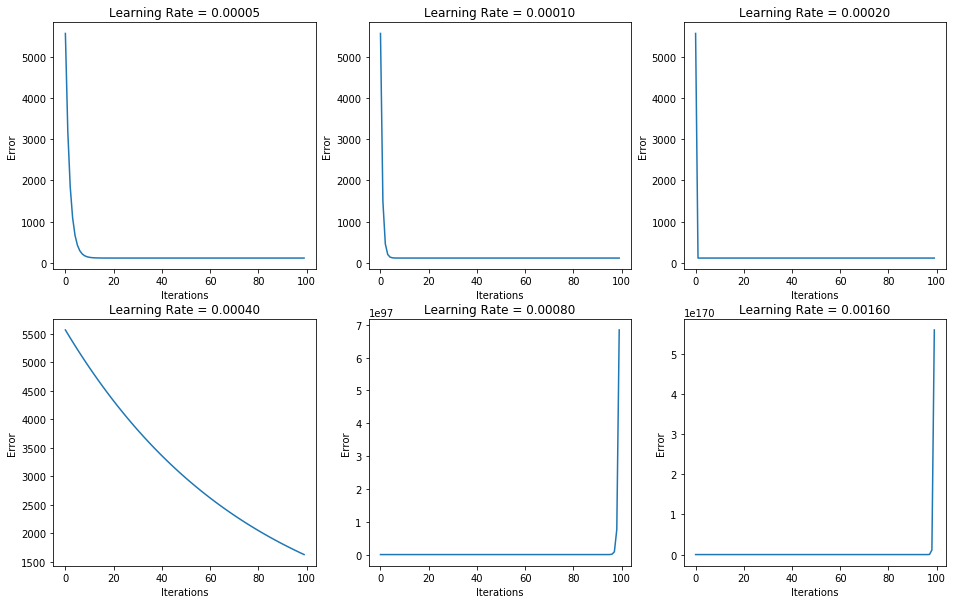

In [52]:
## error to iterations
points = genfromtxt('../data/data.csv', delimiter=',')

plt.figure(figsize=(16,10))

learning_rate = 0.00005
lr = 0
for i in range(0, 6):
    learning_rate = learning_rate + lr 
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    errors = []
    iterations = []
    num_iterations = 100
    lr = learning_rate
    for j in range(0, num_iterations):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, j)
        error_ = compute_error_for_line_given_points(b, m, points)
        errors.append(error_)
        iterations.append(j)
    
    plt.subplot(2,3,i+1)
    plt.plot(iterations, errors)
    plt.title('Learning Rate = %.5f' % learning_rate)
    plt.xlabel('Iterations')
    plt.ylabel('Error')

plt.show()

%% From this we can find that the best learning rate is around 0.0002. When learning rate is bigger than 0.0004, we may get a divergent solution.